In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
# Load the preprocessed Raisin dataset from the CSV file into a pandas DataFrame
df = pd.read_csv("Raisin_preprocessed.csv")

In [68]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.590559,81463.0,0.792772,1073.251,1


In [69]:
select_col = df.drop(['Class'], axis=1)   # Drop the 'Class' column and keep only feature columns
select_col.head()                         # Show the first 5 rows of the selected columns

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162
4,79408.0,352.190770,290.827533,0.590559,81463.0,0.792772,1073.251


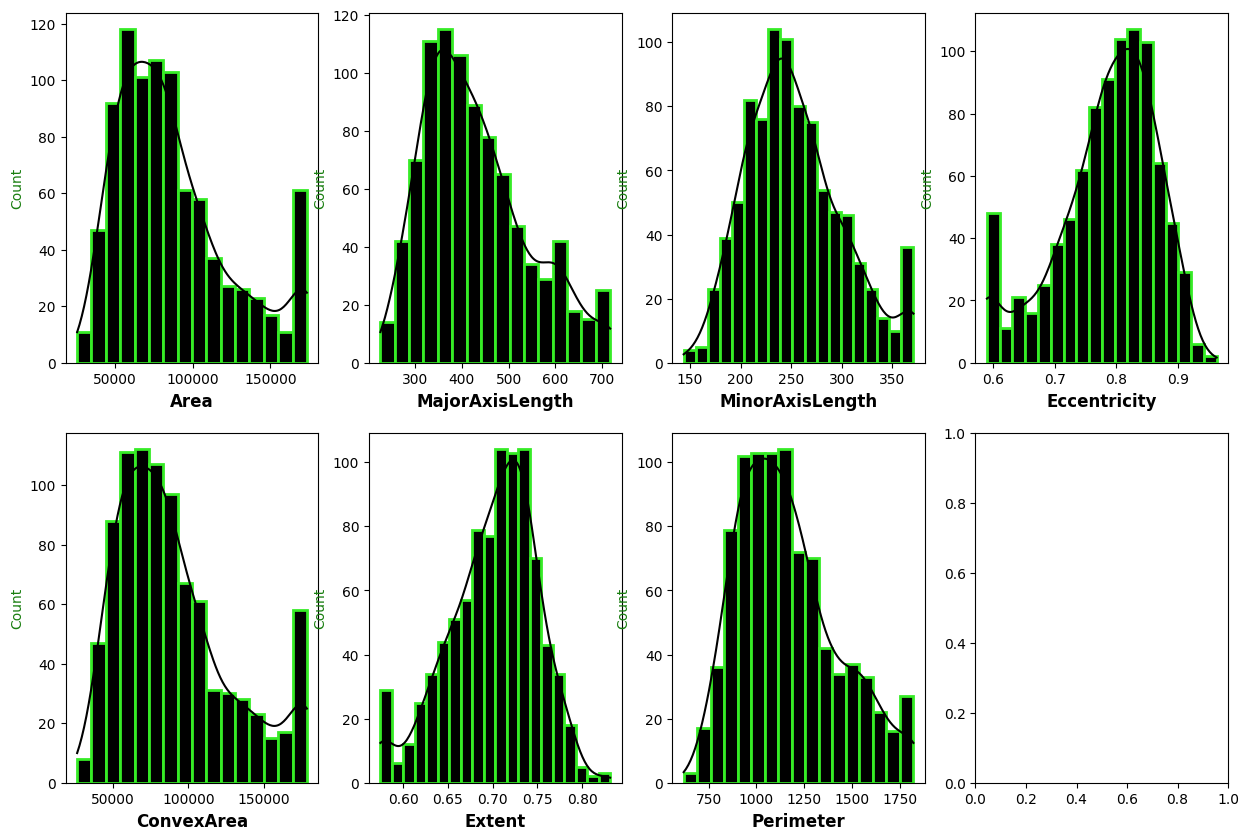

In [70]:
sel_col = [
    'Area',
    'MajorAxisLength',
    'MinorAxisLength', 
    'Eccentricity',
    'ConvexArea', 
    'Extent', 
    'Perimeter'
]
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
for ax, col in zip(axes.flatten(), sel_col):
    sns.histplot(
        data= df, 
        x= col, 
        ax = ax,
        color='black',
        alpha=1,
        linewidth=2,
        edgecolor="#36EB26",
        kde=True
    )
    ax.set_xlabel(col, color="black", fontsize= 12, fontweight='bold')
    ax.set_ylabel("Count", color="#197E10", fontsize= 10)

C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_28500\3607199012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


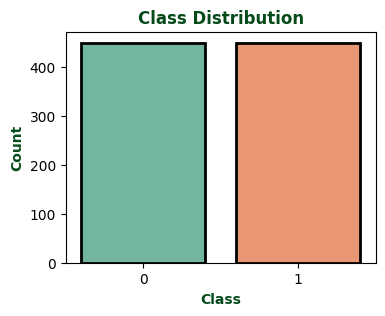

In [71]:
plt.figure(figsize=(4, 3))                              # Set figure size

sns.barplot(
    x=df["Class"].value_counts().index,                 # Use class labels for x-axis
    y=df["Class"].value_counts().values,                # Use class counts for y-axis
    palette='Set2',                                     # Apply color palette to bars
    edgecolor='black',                                  # Set bar border color
    linewidth=2                                         # Set bar border thickness
)

plt.title('Class Distribution', color='#054B1A', fontweight='bold')  # Style plot title
plt.xlabel('Class', color="#054B1A", fontweight='bold')              # Style x-axis label
plt.ylabel('Count', color='#054B1A', fontweight='bold')              # Style y-axis label
plt.show()                                                           # Display the plot

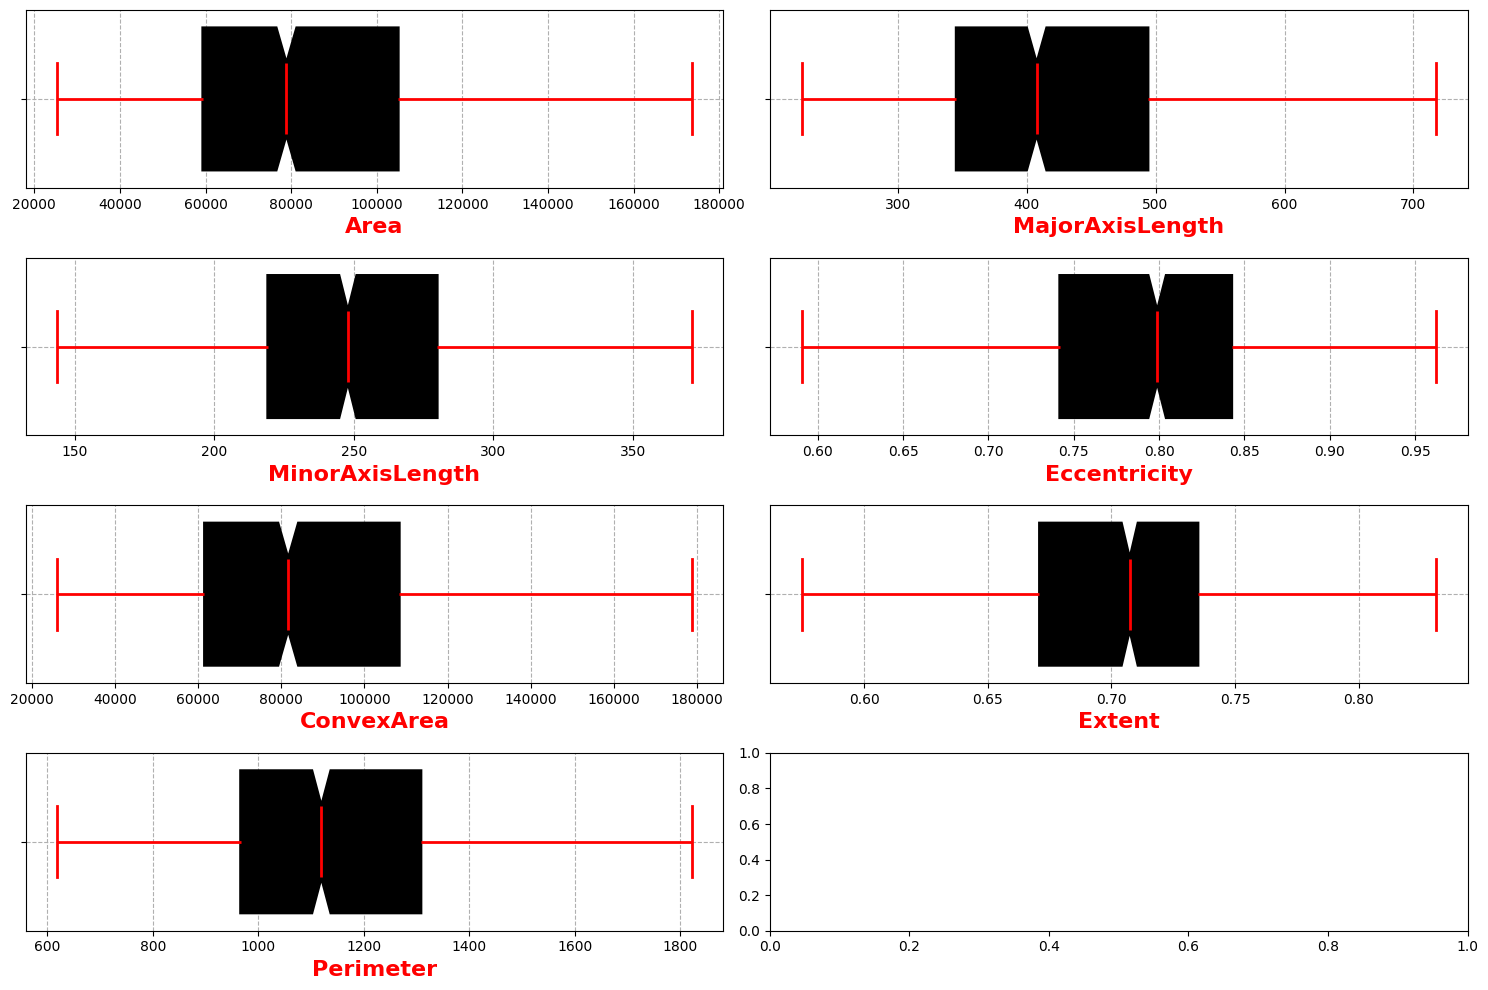

In [72]:
select_col = df.drop(['Class'], axis=1)          # Drop target column and keep only feature columns

fig, axes = plt.subplots(4, 2, figsize=(15, 10)) # Create a 4X2 grid of subplots with custom figure size

for ax, col in zip(axes.flatten(), select_col.columns):
    sns.boxplot(
        x=select_col[col],                       # Plot boxplot for the current feature column
        ax=ax,                                   # Assign the plot to the current subplot axis
        color='black',                           # Set box fill color
        linewidth=2,                             # Set box border line width
        linecolor='red',                         # Set line color for median and whiskers
        fliersize=6,                             # Set size of outlier points
        notch=True,                              # Enable notch to show median confidence
        boxprops=dict(edgecolor='black'),        # Set box edge color
    )
    ax.set_xlabel(col, color='red', fontsize=16, fontweight='bold')  # Set x-axis label style
    ax.grid(True, linestyle="--")                # Enable grid with dashed lines

plt.tight_layout()                               # Adjust subplot spacing to avoid overlap
plt.show()                                       # Display all boxplots

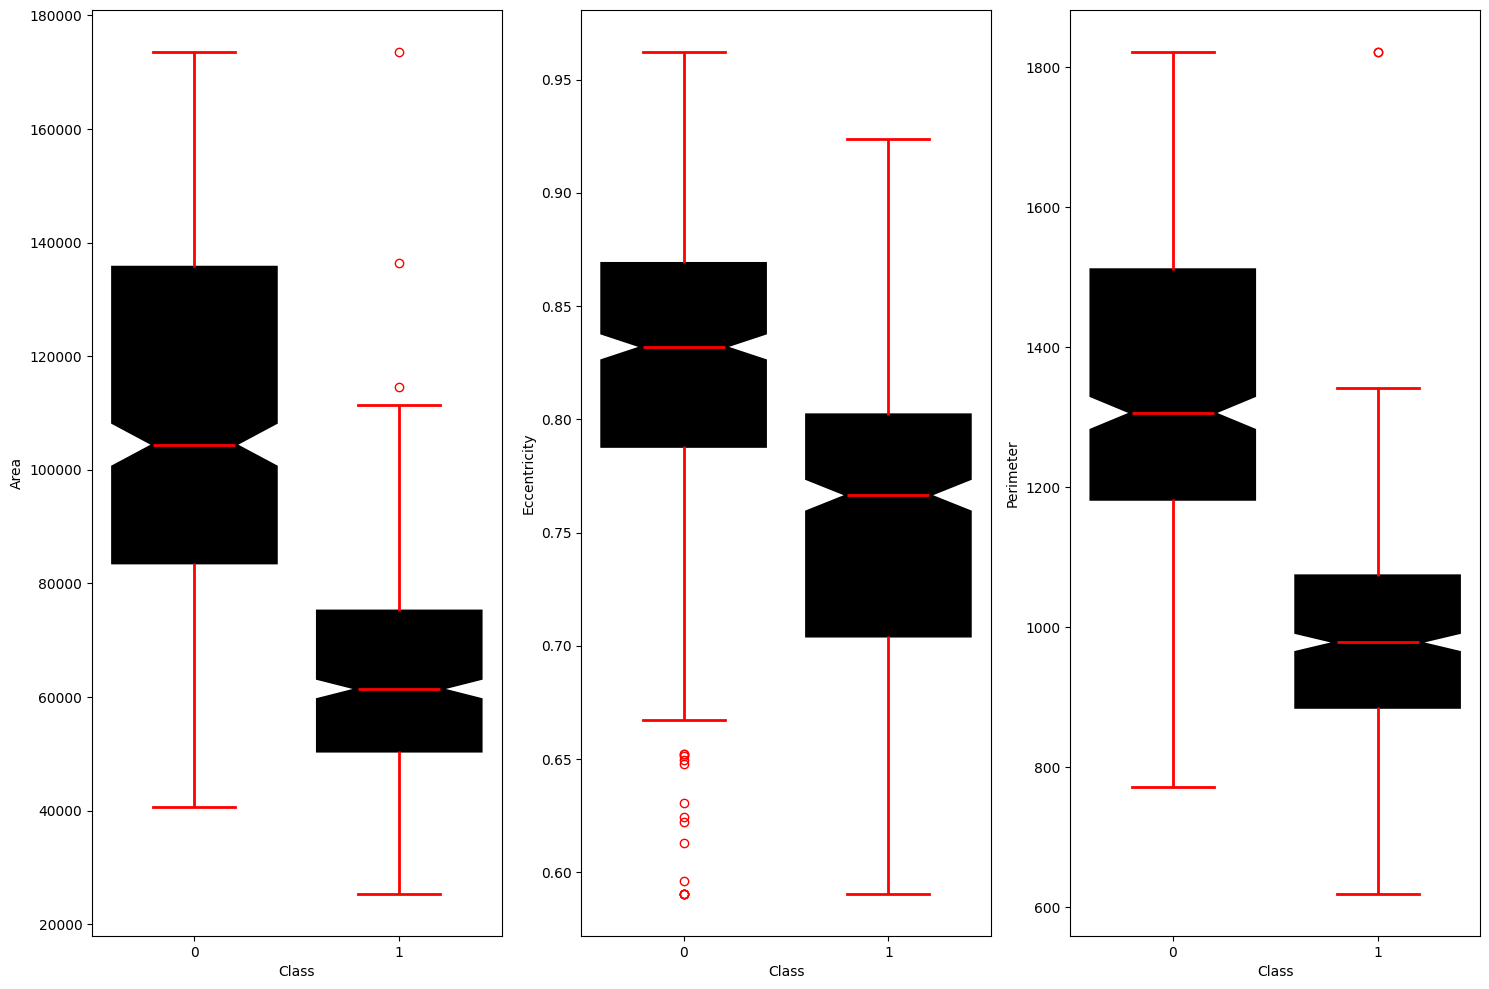

In [73]:
col_x = ['Area', 'Eccentricity', 'Perimeter']     
target = 'Class'

fig, axes = plt.subplots(1, 3, figsize=(15, 10)) # Create a 2x4 grid of subplots with custom figure size

for ax, colx in zip(axes.flatten(), col_x):
    sns.boxplot(
        data=df,
        x=target,                       # Plot boxplot for the current feature column
        y=colx,
        ax=ax,                                   # Assign the plot to the current subplot axis
        color='black',                           # Set box fill color
        linewidth=2,                             # Set box border line width
        linecolor='red',                         # Set line color for median and whiskers
        fliersize=6,                             # Set size of outlier points
        notch=True,                              # Enable notch to show median confidence
        boxprops=dict(edgecolor='black'),        # Set box edge color
    )

plt.tight_layout()                               # Adjust subplot spacing to avoid overlap
plt.show()    

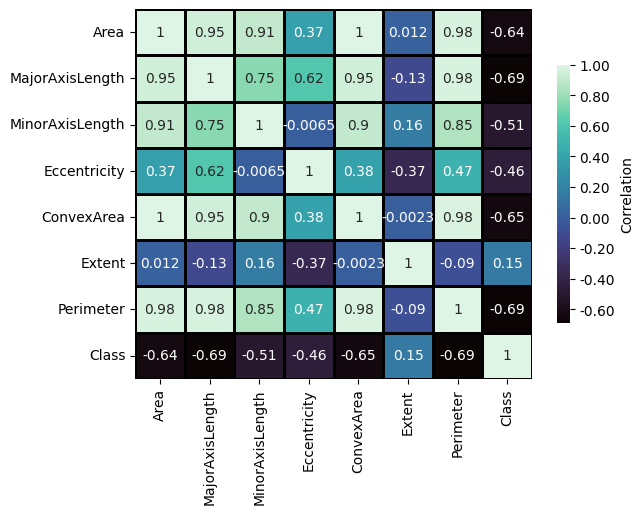

In [74]:
sns.heatmap(
    df.corr(),                              # Compute correlation matrix for the DataFrame
    annot=True,                             # Display correlation values on the heatmap
    cmap='mako',                            # Apply color map
    linewidths=2,                           # Set width of grid lines
    linecolor='black',                      # Set color of grid lines
    cbar_kws={
        'shrink': 0.7,                     # Adjust color bar size
        'label': "Correlation",            # Set color bar label
        'format': '%.2f'                   # Format correlation values to 2 decimals
    }
)
plt.show()                                  # Display the heatmap

In [75]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')